In [1]:
import morePVs_output as opm
import morePVs as mpv
import os
import en_utilities as um
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

Plotting Total Building Costs
-----------------------------------


Repeating barchart plot from APSRC 2017 paper
1) for EN
2) for btm
For range of:
* PV sizes
* external tariffs and amortization periods

A) Repeat plot, replot for other parameters

B) Plot bau, en, en and pv for range of pvs for each site
   x different tariffs and terms
   x with / without parent FiT
   
   
 


In [3]:
#
# Need to set this up using combined_value2 as the study
project='EN1_value_of_pv2'
study_name='combined_value5_6'
base_path='C:\\Users\\z5044992\\Documents\\MainDATA\\DATA_EN_3\\studies'
op = opm.Output(base_path = base_path,
                          project = project,
                          study_name = study_name)

In [6]:
self = op
df = self.data.copy()
df_in = self.study_parameters.copy()

#df=df.set_index(['scenario'])
df.head()

,scenario_label,arrangement,number_of_households,load_folder,central_battery_kWh,en_opex,en_capex_repayment,pv_capex_repayment,average_hh_bill$,average_hh_solar_bill$,...,eno_net$_mean,export_kWh_mean,import_kWh_mean,pv_ratio_mean,retailer_bill$_mean,retailer_receipt$_mean,self-consumption_mean,solar_retailer_profit_mean,total$_building_costs_mean,total_building_load_mean
scenario,,,,,,,,,,,,,,,,,,,,,
A0,siteA_value5_000,bau,208,h_all_site_A,0,0.0,0.0,0.000000,1210.652254,0.0,...,0.0,0.000000,1079092.178,0.000000,46188.85679,344031.9793,100.000000,0.0,344031.9793,1079092.178
A1,siteA_value5_001,cp_only,208,h_all_site_A,0,0.0,0.0,12277.102280,1210.652254,0.0,...,0.0,4.685924,1015101.292,5.935119,44630.40147,326734.0259,99.992678,0.0,339011.1282,1079092.178
A2,siteA_value5_002,cp_only,208,h_all_site_A,0,0.0,0.0,7050.245955,1210.652254,0.0,...,0.0,4.685924,1015101.292,5.935119,44630.40147,326734.0259,99.992678,0.0,333784.2719,1079092.178
A3,siteA_value5_003,cp_only,208,h_all_site_A,0,0.0,0.0,6842.075547,1210.652254,0.0,...,0.0,4.685924,1015101.292,5.935119,44630.40147,326734.0259,99.992678,0.0,333576.1014,1079092.178
A4,siteA_value5_004,cp_only,208,h_all_site_A,0,0.0,0.0,5808.894665,1210.652254,0.0,...,0.0,4.685924,1015101.292,5.935119,44630.40147,326734.0259,99.992678,0.0,332542.9206,1079092.178


In [7]:

df = df.merge(df_in,left_index = True, right_index=True)
for c in df.columns:
    if '_x' in c:
        nc = c[:-2]
        df.rename(columns={c:nc}, inplace=True)
df.head()

,scenario_label,arrangement,number_of_households,load_folder,central_battery_kWh,en_opex,en_capex_repayment,pv_capex_repayment,average_hh_bill$,average_hh_solar_bill$,...,pv_cap_id,cp,all_residents,parent,network_tariff,en_capex_id,a_term,a_rate,site_tag,pv_kW_peak
scenario,,,,,,,,,,,,,,,,,,,,,
A0,siteA_value5_000,bau,208,h_all_site_A,0,0.0,0.0,0.000000,1210.652254,0.0,...,NaN,EASO_TOU_15pc_FIT8,EASO_TOU_15pc_FIT8,TIDNULL,EA310,NaN,5,0.06,a208_f12_cp34,0.00
A1,siteA_value5_001,cp_only,208,h_all_site_A,0,0.0,0.0,12277.102280,1210.652254,0.0,...,site_A_max,EASO_TOU_15pc_FIT8,EASO_TOU_15pc_FIT8,TIDNULL,EA310,NaN,5,0.06,a208_f12_cp34,47.25
A2,siteA_value5_002,cp_only,208,h_all_site_A,0,0.0,0.0,7050.245955,1210.652254,0.0,...,site_A_max,EASO_TOU_15pc_FIT8,EASO_TOU_15pc_FIT8,TIDNULL,EA310,NaN,10,0.06,a208_f12_cp34,47.25
A3,siteA_value5_003,cp_only,208,h_all_site_A,0,0.0,0.0,6842.075547,1210.652254,0.0,...,site_A_max,EASO_TOU_15pc_FIT8,EASO_TOU_15pc_FIT8,TIDNULL,EA310,NaN,15,0.06,a208_f12_cp34,47.25
A4,siteA_value5_004,cp_only,208,h_all_site_A,0,0.0,0.0,5808.894665,1210.652254,0.0,...,site_A_max,EASO_TOU_15pc_FIT8,EASO_TOU_15pc_FIT8,TIDNULL,EA310,NaN,20,0.06,a208_f12_cp34,47.25


In [ ]:
#df = df[df['arrangement'].isin(['bau', 'en', 'en_pv', 'btm_icp'])]

In [8]:
# Set up constants
sites=['A','E','D','B','H','I','G','C','J','F']
# Plotting set-up parameters
cmap = mpl.cm.tab10
alpha=1
markers =['x','o','D','*','^','H','s','v','>','<']
site_markers = dict(zip(sites,markers))
colours = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
site_colours = dict(zip(sites,colours))
# get pv sizes for maximum pv systems
maximums={}
pv_ref_file='C:\\Users\\z5044992\\Documents\\MainDATA\\DATA_EN_3\\reference\\capex_pv_lookup.csv'
pv_ref=pd.read_csv(pv_ref_file)
pv_ref = pv_ref.set_index('pv_cap_id')
for i in pv_ref.index:
    if 'max' in i and 'site' in i:
        site = um.find_between(i,'_','_')
        maximums[site] = pv_ref.loc[i,'kW']
en_capexes= ['capex_low','capex_med','capex_high']
parents = ['EA310_12c_FIT8', 'EA310_12c_FIT12', 'EA310_12c',
           'EA310_10c_FIT8', 'EA310_10c_FIT12', 'EA310_10c',
         'EA310_8c_FIT8', 'EA310_8c_FIT12','EA310_8c']
a_rates =[5,10,15,20,25]

In [9]:
# get kWp / unit and total $ / unit for each scenario
df['pv_filename'].fillna('zero',inplace=True)
for s in df.index:
    site = df.loc[s,'load_folder'][-1]
    df.loc[s,'site']=site
    if df.loc[s,'pv_filename'] == 'zero':
        df.loc[s,'kwp_unit'] =0
    elif 'max' in df.loc[s,'pv_filename']:
        df.loc[s,'kwp_unit']= maximums[site]/df.loc[s,'number_of_households']
    else:
        df.loc[s,'kwp_unit'] = float(df.loc[s,'pv_filename'][-9]) + float(df.loc[s,'pv_filename'][-7])/10
    df.loc[s,'$_unit'] = df.loc[s,'total$_building_costs_mean']/df.loc[s,'number_of_households']

    
        

In [48]:
dfx.columns

Index(['scenario_label', 'arrangement', 'number_of_households', 'load_folder',
       'central_battery_kWh', 'en_opex', 'en_capex_repayment',
       'pv_capex_repayment', 'average_hh_bill$', 'average_hh_solar_bill$',
       'average_hh_total$', 'checksum_total_payments$_mean', 'cp_ratio_mean',
       'cust_bill_cp_mean', 'cust_solar_bill_cp_mean', 'cust_total$_cp_mean',
       'eno$_bat_capex_repay_mean', 'eno$_energy_bill_mean',
       'eno$_receipts_from_residents_mean', 'eno$_total_payment_mean',
       'eno_net$_mean', 'export_kWh_mean', 'import_kWh_mean', 'pv_ratio_mean',
       'retailer_bill$_mean', 'retailer_receipt$_mean',
       'self-consumption_mean', 'solar_retailer_profit_mean',
       'total$_building_costs_mean', 'total_building_load_mean', 'pv_filename',
       'load_folder_y', 'arrangement_y', 'pv_cap_id', 'cp', 'all_residents',
       'parent', 'network_tariff', 'en_capex_id', 'a_term', 'a_rate',
       'site_tag', 'pv_kW_peak', 'site', 'kwp_unit', '$_unit', 'labels'

In [46]:
df4

,scenario_label,arrangement,number_of_households,load_folder,central_battery_kWh,en_opex,en_capex_repayment,pv_capex_repayment,average_hh_bill$,average_hh_solar_bill$,...,en_capex_id,a_term,a_rate,site_tag,pv_kW_peak,site,kwp_unit,$_unit,labels,label
scenario,,,,,,,,,,,,,,,,,,,,,
A0,siteA_value5_000,bau,208,h_all_site_A,0,0.0,0.000000,0.000000,1210.652254,0.0,...,NaN,5,0.06,a208_f12_cp34,0.00,A,0.000000,1653.999900,A,A(208/12)
A1,siteA_value5_001,cp_only,208,h_all_site_A,0,0.0,0.000000,12277.102280,1210.652254,0.0,...,NaN,5,0.06,a208_f12_cp34,47.25,A,0.227163,1629.861193,A,A(208/12)
A2,siteA_value5_002,cp_only,208,h_all_site_A,0,0.0,0.000000,7050.245955,1210.652254,0.0,...,NaN,10,0.06,a208_f12_cp34,47.25,A,0.227163,1604.732076,A,A(208/12)
A3,siteA_value5_003,cp_only,208,h_all_site_A,0,0.0,0.000000,6842.075547,1210.652254,0.0,...,NaN,15,0.06,a208_f12_cp34,47.25,A,0.227163,1603.731257,A,A(208/12)
A4,siteA_value5_004,cp_only,208,h_all_site_A,0,0.0,0.000000,5808.894665,1210.652254,0.0,...,NaN,20,0.06,a208_f12_cp34,47.25,A,0.227163,1598.764041,A,A(208/12)
A5,siteA_value5_005,cp_only,208,h_all_site_A,0,0.0,0.000000,6356.548767,1210.652254,0.0,...,NaN,25,0.06,a208_f12_cp34,47.25,A,0.227163,1601.396994,A,A(208/12)
A6,siteA_value5_006,cp_only,208,h_all_site_A,0,0.0,0.000000,12277.102280,1210.652254,0.0,...,NaN,5,0.06,a208_f12_cp34,47.25,A,0.227163,1629.860292,A,A(208/12)
A7,siteA_value5_007,cp_only,208,h_all_site_A,0,0.0,0.000000,7050.245955,1210.652254,0.0,...,NaN,10,0.06,a208_f12_cp34,47.25,A,0.227163,1604.731175,A,A(208/12)
A8,siteA_value5_008,cp_only,208,h_all_site_A,0,0.0,0.000000,6842.075547,1210.652254,0.0,...,NaN,15,0.06,a208_f12_cp34,47.25,A,0.227163,1603.730356,A,A(208/12)


In [77]:
# For barchart, use single set of parameters:
capex= 'capex_med'
#1) Max PV for Site

tariff = 'EASO_TOU_15pc_FIT8'
parent_retail = '_TOU10'  # no FiT
a_term = 10 
sites = sites
arrangements = ['bau', 'cp_only', 'btm_icp', 'btm_s_c' ,'en', 'en_pv']
dfx= df.copy()
df1 = dfx.loc[(dfx['arrangement'] == 'bau') & (dfx['all_residents'] == tariff)]
df2 = dfx.loc[(dfx['arrangement'] == 'btm_icp') & (dfx['all_residents'] == tariff) &
              (dfx['a_term'] == a_term) & (dfx['pv_filename'].str.contains('max'))]
df3 = dfx.loc[(dfx['arrangement'] == 'btm_s_c') & (dfx['all_residents'] == tariff) &
              (dfx['a_term'] == a_term) & (dfx['pv_filename'].str.contains('max'))& (dfx['en_capex_id'] == 'upfront_1')]
df4 = dfx.loc[(dfx['arrangement'] == 'en_pv') & (dfx['parent'].str.contains(parent_retail)) & ~(dfx['parent'].str.contains('FIT')) &
              (dfx['a_term'] == a_term) & (dfx['pv_filename'].str.contains('max')) & (dfx['en_capex_id'] == capex)]
df5 = dfx.loc[(dfx['arrangement'] == 'en') & (dfx['parent'].str.contains(parent_retail)) & ~(dfx['parent'].str.contains('FIT')) &
              (dfx['a_term'] == a_term) & (dfx['en_capex_id'] == capex)]
              
dfallmax = df1.append([df2,df3,df4,df5])           

In [78]:
# For barchart, use single set of parameters:
capex= 'capex_med'

#2)
kWp_per_unit = 1.0

tariff = 'EASO_TOU_15pc_FIT8'
parent_retail = '_TOU10'  # no FiT
a_term = 10 
sites = sites
arrangements = ['bau', 'cp_only', 'btm_icp', 'btm_s_c' ,'en', 'en_pv']
dfx= df.copy()
df1 = dfx.loc[(dfx['arrangement'] == 'bau') & (dfx['all_residents'] == tariff)]

df2 = dfx.loc[(dfx['arrangement'] == 'btm_icp') & (dfx['all_residents'] == tariff) &
              (dfx['a_term'] == a_term) &
              (dfx['kwp_unit'] > 0.95) & (dfx['kwp_unit'] < 1.05) ]

df3 = dfx.loc[(dfx['arrangement'] == 'btm_s_c') & (dfx['all_residents'] == tariff) &
              (dfx['a_term'] == a_term) & (dfx['kwp_unit'] > 0.95) & (dfx['kwp_unit'] < 1.05) & 
              (dfx['en_capex_id'] == 'upfront_1')]

df4 = dfx.loc[(dfx['arrangement'] == 'en_pv') & (dfx['parent'].str.contains(parent_retail)) & ~(dfx['parent'].str.contains('FIT')) &
              (dfx['a_term'] == a_term) & (dfx['kwp_unit'] > 0.95) & (dfx['kwp_unit'] < 1.05) &
              (dfx['en_capex_id'] == capex)]

df5 = dfx.loc[(dfx['arrangement'] == 'en') & (dfx['parent'].str.contains(parent_retail)) & ~(dfx['parent'].str.contains('FIT')) &
              (dfx['a_term'] == a_term) & (dfx['en_capex_id'] == capex)]
              
dfall1 = df1.append([df2,df3,df4,df5])   

In [79]:
dfallmax

,scenario_label,arrangement,number_of_households,load_folder,central_battery_kWh,en_opex,en_capex_repayment,pv_capex_repayment,average_hh_bill$,average_hh_solar_bill$,...,en_capex_id,a_term,a_rate,site_tag,pv_kW_peak,site,kwp_unit,$_unit,labels,label
scenario,,,,,,,,,,,,,,,,,,,,,
A0,siteA_value5_000,bau,208,h_all_site_A,0,0.00,0.000000,0.000000,1210.652254,0.0,...,NaN,5,0.06,a208_f12_cp34,0.00,A,0.000000,1653.999900,A,A(208/12)
B0,siteB_value5_000,bau,104,h_all_site_B,0,0.00,0.000000,0.000000,1209.922707,0.0,...,NaN,5,0.06,a104_f8_cp57,0.00,B,0.000000,2348.921098,B,B(104/8)
C0,siteC_value5_000,bau,34,h_all_site_C,0,0.00,0.000000,0.000000,1200.492334,0.0,...,NaN,5,0.06,a34_f4_cp34,0.00,C,0.000000,1634.107377,C,C(34/4)
D0,siteD_value5_000,bau,138,h_all_site_D,0,0.00,0.000000,0.000000,1203.710779,0.0,...,NaN,5,0.06,a138_f9_cp45,0.00,D,0.000000,1882.644970,D,D(138/9)
E0,siteE_value5_000,bau,161,h_all_site_E,0,0.00,0.000000,0.000000,1202.424345,0.0,...,NaN,5,0.06,a161_f7_cp38,0.00,E,0.000000,1731.957576,E,E(161/7)
F0,siteF_value5_000,bau,20,h_all_site_F,0,0.00,0.000000,0.000000,1185.296272,0.0,...,NaN,5,0.06,a20_f5_cp37,0.00,F,0.000000,1686.245085,F,F(20/5)
G0,siteG_value5_000,bau,44,h_all_site_G,0,0.00,0.000000,0.000000,1209.234957,0.0,...,NaN,5,0.06,a44_f4_cp17,0.00,G,0.000000,1385.489204,G,G(44/4)
H0,siteH_value5_000,bau,52,h_all_site_H,0,0.00,0.000000,0.000000,1202.065741,0.0,...,NaN,5,0.06,a52_f3_cp27,0.00,H,0.000000,1500.654178,H,H(52/3)
I0,siteI_value5_000,bau,48,h_all_site_I,0,0.00,0.000000,0.000000,1194.009834,0.0,...,NaN,5,0.06,a48_f4_cp09,0.00,I,0.000000,1285.558760,I,I(48/4)


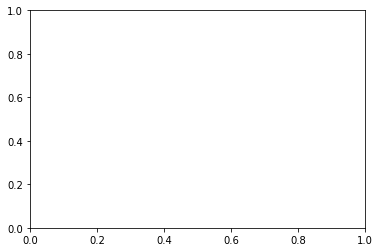

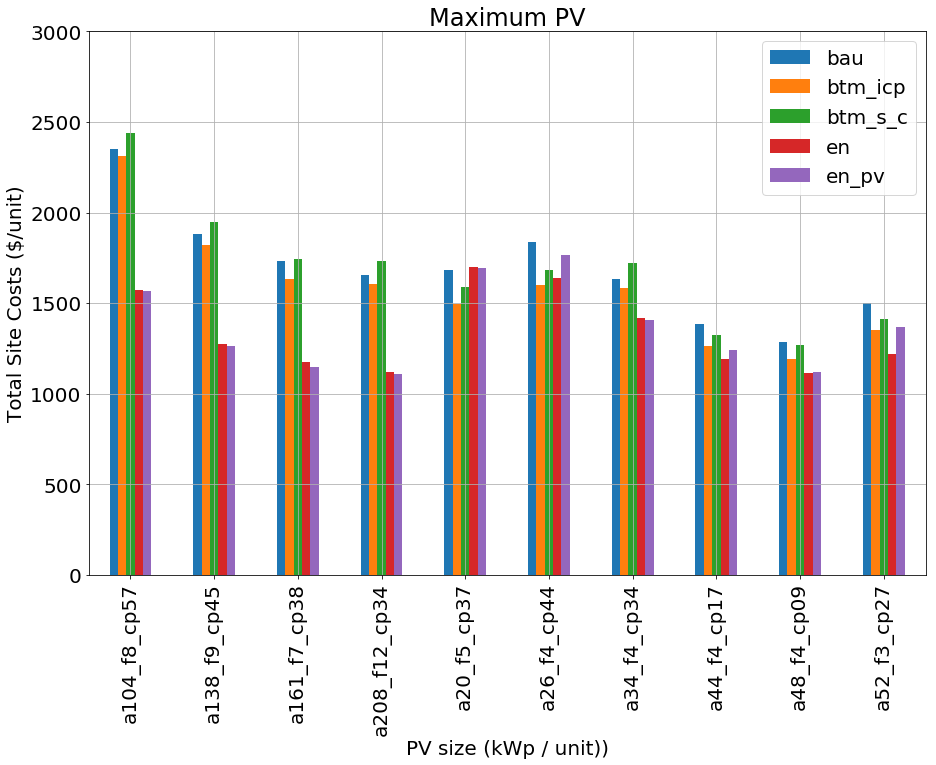

In [82]:
dfx= dfallmax

# Get rid of duplicates - assumed irrelevant as only variation is internal tariffs
dfx.loc[:,'kwp_str'] = dfx.loc[:,'kwp_unit'].apply(lambda x : str(round(x,2)))
dfx['combined'] = dfx['site']+ '_' + dfx['arrangement'] + '_'+ dfx['kwp_str']
dfx['arr_pv'] = dfx['arrangement'] + '_'+ dfx['kwp_str']
dfx = dfx.drop_duplicates('combined')
#fx['combined'] = dfx['combined'].apply(lambda x: x[1:])


# ----------------------
# reindex and stack data
# ----------------------
dfx.index = [dfx.site_tag,dfx.arrangement]
dfu = dfx['$_unit'].unstack()



# --------------------------
# Choose order of categories
# --------------------------
#dfu = dfu.loc[[labels[s] for s in sites],:]


# Plotting set-up parameters
cmap = mpl.cm.tab10
alpha=1

arr_list = dfx['combined'].apply(lambda x : x[1:]).tolist()
fig, ax = plt.subplots()
ax = dfu.plot(kind='bar',figsize=(15, 10), fontsize=20)
ax.set_xlabel("PV size (kWp / unit))", fontsize=20)
ax.set_ylabel("Total Site Costs ($/unit)", fontsize=20)
ax.set_title ("Maximum PV",fontsize=24)
ax.legend(fontsize=20)
ax.grid(True)
ax.set_ylim((0,3000))
#fig.show()
pname = 'bar_' + study_name +'maxpv.tiff'
plotFile = os.path.join(self.plot_path,pname)
plt.savefig(plotFile,dpi=1000)



Output is not much use.
Could try plotting $ cost vs kWp with coloour per site?

In [ ]:
sites

In [ ]:
for parent, capex  in zip (parents, en_capexes):   
    title = parent + " / " + capex                        
    p_slice = df['parent'] == parent 
    c_slice = df['en_capex_id'] == capex
    dfx=df.copy()[p_slice & c_slice]
    
    # Get rid of duplicates - assumed irrelevant as only variation is internal tariffs
    dfx.loc[:,'kwp_str'] = dfx.loc[:,'kwp_unit'].apply(lambda x : str(round(x,2)))
    dfx['combined'] = dfx['site']+ '_' + dfx['arrangement'] + '_'+ dfx['kwp_str']
    dfx['arr_pv'] = dfx['arrangement'] + '_'+ dfx['kwp_str']
    dfx = dfx.drop_duplicates('combined')
    #fx['combined'] = dfx['combined'].apply(lambda x: x[1:])
    
    
    # ----------------------
    # reindex and stack data
    # ----------------------
    dfx.index = [dfx.label,dfx.arr_pv]
    dfu = dfx['$_unit'].unstack()

    cols =dfu.columns
    cols = [c[3:] for c in cols ]
    cols = [0.0]+[float(c[3:]) for c in cols if 'pv' in c]
    dfu.columns=cols
    dfv=dfu.transpose()
    dfv


    fig, ax = plt.subplots()
    for label in [c for c in dfv.columns if 'colour' not in c]:       
        y = dfv[label].dropna()
        x = y.index
        #dfv['colour'] = sites.index(label[0])
        line = ax.plot(x,y,   alpha=alpha,  c = site_colours[label[0]],linewidth = 1, marker = site_markers[label[0]], markersize=3)
        #scat = ax.scatter(x, y, s=2,  cmap=cmap, alpha=alpha,  c = site_colours[label[0]], marker = site_markers[label[0]])  
    ax.set_title(title, fontsize=16, y=1.0)
    ax.set_xlabel("PV system (kWp)", fontsize=14)
    ax.set_ylabel("Total Site Costs $ / unit", fontsize=14)
    # Legend outside box and resize chart to fit
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    ax.grid(True)
    ax.set_ylim((0,3000))
    pname = study_name +'_aterm_'+ parent+'_' + capex + '.png'
    plotFile = os.path.join(self.plot_path,pname)
    plt.savefig(plotFile,dpi=1000)

In [ ]:
dfv[labels['A']].dropna()